<a href="https://colab.research.google.com/github/D-DePablos/WEW/blob/master/Stage%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 5: The Sun

A very important part of our Solar System is the Sun itself. It is for this reason that we, as its residents, have many observatories, both ground and space-based, that take measurements related to it and its influence.



1.   Installing the relevant modules
2.   Fetching Images from current spacecraft
3.   Plotting them
4.   Making a video in Python (intro)

## Installing the relevant modules

The first step here will be to get a module installed inside the jupyter notebook. To do that, just **run the following line the first time you open this notebook:**

In [7]:
!pip install -q sunpy[all]  # This package is used for all things Sun-related, hosted in github: https://github.com/sunpy/sunpy


**After the installation is finished, click on Runtime and Restart the Runtime with Control + M!**

In [8]:
from sunpy.net import Fido, attrs as a
from astropy import units as u  

from datetime import datetime   # Python's small Time module

valid_wavelengths = [94, 131, 171, 193, 211, 304, 335, 1600, 1700]  # Note that 16/1700 are white light and not as useful here!


Inst = 'aia'  # Here we will use the Atmospheric Imaging Assembly: aia
# It is onboard the Solar Dynamics Observatory. 
#Provides us with images of the Sun almost 24-7!


# Now choose the period we would like to get our data from. Please don't do too much at once!

start_time = datetime(2012,8,31,14,0)  # Year,Month,Day,Hour,Minute
end_time = datetime(2012,9,1,4,59)


lambda_ang = valid_wavelengths[2] * u.Angstrom  # Choose the 193 Angstrom wavelength as an example (Extreme Ultraviolet)


samplerate_hours = 0.25 * u.hour  # We need to give our images a cadence for collection. 
# Please keep in mind that aia takes an image in all of its wavelengths every 10 seconds or so.
# Choose a cadence depending on what you want to bring out!

  
fido = Fido.search(a.Time(start=start_time, end=end_time), a.Instrument(Inst), a.Wavelength(lambda_ang), a.vso.Sample(samplerate_hours))

print(fido)

Results from 1 Provider:

60 Results from the VSOClient:
       Start Time       ...
                        ...
----------------------- ...
2012-08-31 14:00:11.000 ...
2012-08-31 14:15:11.000 ...
2012-08-31 14:30:11.000 ...
2012-08-31 14:45:11.000 ...
2012-08-31 15:00:11.000 ...
2012-08-31 15:15:11.000 ...
2012-08-31 15:30:11.000 ...
2012-08-31 15:45:11.000 ...
2012-08-31 16:00:11.000 ...
2012-08-31 16:15:11.000 ...
                    ... ...
2012-09-01 02:30:11.000 ...
2012-09-01 02:45:11.000 ...
2012-09-01 03:00:11.000 ...
2012-09-01 03:15:11.000 ...
2012-09-01 03:30:11.000 ...
2012-09-01 03:45:11.000 ...
2012-09-01 04:00:11.000 ...
2012-09-01 04:15:11.000 ...
2012-09-01 04:30:11.000 ...
2012-09-01 04:45:11.000 ...
Length = 60 rows




Now, we should have a series of results showing above this text-box. These are available records that we may now download:

In [9]:
from os import makedirs as newdir

dir_images = 'My_folder'
newdir(dir_images, exist_ok = True)

Fido.fetch(fido, path = 'My_folder/')

Files Downloaded:   0%|          | 0/60 [00:00<?, ?file/s]

aia_lev1_171a_2012_08_31t14_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t14_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t15_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t15_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t16_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t16_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t17_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t17_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t18_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t18_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t19_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t19_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t20_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t20_45_00_95z_image_lev1.fits:   0%|          | 0.00/11.1M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t21_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t21_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t22_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t22_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t23_15_11_35z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_08_31t23_45_11_35z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t00_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t00_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t01_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t01_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t02_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t02_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t03_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t03_45_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t04_15_11_34z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

aia_lev1_171a_2012_09_01t04_45_11_35z_image_lev1.fits:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

['My_folder/aia_lev1_171a_2012_08_31t16_00_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t21_15_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t23_30_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t17_45_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t20_00_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_09_01t02_30_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t21_00_08_50z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t23_00_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t15_30_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t20_30_12_12z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_09_01t04_45_11_35z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t22_45_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t16_30_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_09_01t01_00_11_34z_image_lev1.fits', 'My_folder/aia_lev1_171a_2012_08_31t19_45_11_34z_image_lev1.f

##Looking at our newly acquired data

Now we need to access this data. For this we may use sunpy:

##Looking at our newly acquired data

Now we need to access this data. For this we may use sunpy:

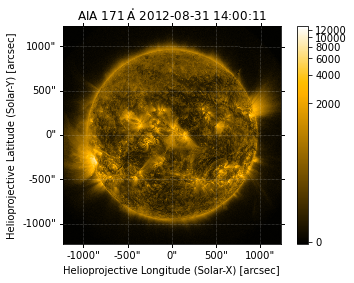

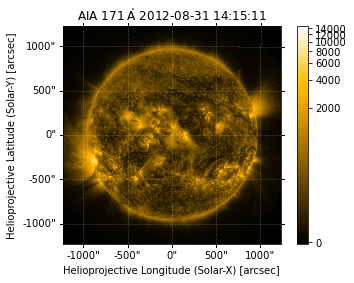

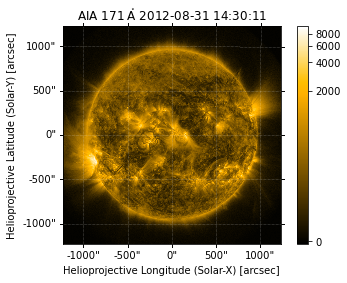

Happy with the results? Press enter again in this box to save all of the figures as png images 


Saved figure 0
Saved figure 1
Saved figure 2
Saved figure 3
Saved figure 4
Saved figure 5
Saved figure 6
Saved figure 7
Saved figure 8
Saved figure 9
Saved figure 10
Saved figure 11
Saved figure 12
Saved figure 13
Saved figure 14
Saved figure 15
Saved figure 16
Saved figure 17
Saved figure 18
Saved figure 19
Saved figure 20
Saved figure 21
Saved figure 22
Saved figure 23
Saved figure 24
Saved figure 25
Saved figure 26
Saved figure 27
Saved figure 28
Saved figure 29
Saved figure 30
Saved figure 31
Saved figure 32
Saved figure 33
Saved figure 34
Saved figure 35
Saved figure 36
Saved figure 37
Saved figure 38
Saved figure 39
Saved figure 40
Saved figure 41
Saved figure 42
Saved figure 43
Saved figure 44
Saved figure 45
Saved figure 46
Saved figure 47
Saved figure 48
Saved figure 49
Saved figure 50
Saved figure 51
Saved figure 52
Saved figure 53
Saved figure 54
Saved figure 55
Saved figure 56
Saved figure 57
Saved figure 58
Saved figure 59
Saved figure 60
Saved figure 61
Saved figure 62
Sa

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import sunpy.map
import glob  # To fetch all files from a directory


map_list = sorted(glob.glob('My_folder/*.fits'))

for picture in map_list[0:3]:
  
  aia_map = sunpy.map.Map(picture)
  aia_map.peek()
  
input('Happy with the results? Press enter again in this box to save all of the figures as png images')


dir_png = 'My_pics'
newdir(dir_png, exist_ok = True)

for index, picture in enumerate(map_list):
  aia_map = sunpy.map.Map(picture)
  aia_map.plot()
  plt.savefig(f'{dir_png}/{index:03d}.png')
  plt.clf()
  
  print(f'Saved figure {index}')
  

As we have just seen, it is fairly straightforward to get images from a spacecraft into Python and show them, but what can we do once we have these images?

## Making videos out of our material

A first good use of these images is to study the dynamics of the solar atmosphere, known to affect spacecraft and the Earth's weather! To do that, we need to have a look at all of the images in rapid succession.

In [11]:
import cv2  # Here, we import OpenCV, a powerful image and video processing tool
from os import getcwd


img_array = []

for filename in sorted(glob.glob(f'{dir_png}/*.png')):
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)

out = cv2.VideoWriter('solar_vid.avi',cv2.VideoWriter_fourcc(*'DIVX'), 3, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


With the above, we will have created a movie called "solar_vid.avi", which holds all of our images together.

## Learning more

To learn more about Python in Solar Physics, feel free to check the following link:

https://github.com/D-DePablos/Python_Taster

Where the installation of Python in your own computer is described (through Anaconda), and some basic functions are at use.



